## **CNN Personalizado**

In [ ]:
#Librerías

import os
import pandas as pd
from sklearn.model_selection import train_test_split
import shutil
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

**Opción de Modelo Número 1**

In [ ]:

data_dir = 'data'  
train_dir = os.path.join(data_dir, 'train_cnn')
validation_dir = os.path.join(data_dir, 'test_cnn')


os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)


In [ ]:
train_info = pd.read_csv('train.csv')  


X = train_info[['filename']]
y = train_info['class_id']

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Combinar características y etiquetas en DataFrames
train_data = pd.concat([X_train, y_train], axis=1)
validation_data = pd.concat([X_val, y_val], axis=1)


In [3]:


def create_train_test_img_folder(train_df, test_df, image_source_dir='images'):
    splits = {'train_cnn': train_df, 'test_cnn': test_df}
    for split, df in splits.items():
        for i, row in df.iterrows():
            source_file = os.path.join(image_source_dir, row['filename'])
            
            # Asignar la subcarpeta basada en la clase
            class_name = 'pinguino' if row['class_id'] == 1 else 'tortuga'
            destination_folder = os.path.join(data_dir, split, class_name)
            
            # Crear la carpeta de destino si no existe
            os.makedirs(destination_folder, exist_ok=True)
            
            # Copiar el archivo a la carpeta correspondiente
            shutil.copy(source_file, destination_folder)
    
    print("Imágenes copiadas a las carpetas 'train_cnn' y 'test_cnn'.")


create_train_test_img_folder(train_data, validation_data)


Imágenes copiadas a las carpetas 'train_cnn' y 'test_cnn'.


In [4]:


def create_cnn(input_shape):
    inputs = Input(shape=input_shape)

    # Primera capa de convolución
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    # Segunda capa de convolución
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    # Tercera capa de convolución
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    # Cuarta capa de convolución
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    # Capa de aplanamiento
    x = Flatten()(x)

    # Capa totalmente conectada
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Cabeza de clasificación
    outputs = Dense(2, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Crear el modelo
input_shape = (128, 128, 3)
model = create_cnn(input_shape)

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     8,389,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,780,482 (33.49 MB)

 Trainable params: 8,779,522 (33.49 MB)

 Non-trainable params: 960 (3.75 KB)

In [5]:


train_dir = 'data/train_cnn'
validation_dir = 'data/test_cnn'


train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


train_dataset = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


validation_dataset = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


for images, labels in train_dataset:
    print(images.shape, labels.shape)
    break

for images, labels in validation_dataset:
    print(images.shape, labels.shape)
    break


Found 379 images belonging to 2 classes.
Found 95 images belonging to 2 classes.
(32, 128, 128, 3) (32, 2)
(32, 128, 128, 3) (32, 2)


In [6]:
# Entrenar el modelo
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset
)


c:\Users\monte\.conda\envs\images\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 13s 930ms/step - accuracy: 0.5301 - loss: 8.8942 - val_accuracy: 0.5053 - val_loss: 1.2747
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 658ms/step - accuracy: 0.7581 - loss: 2.0586 - val_accuracy: 0.4632 - val_loss: 0.8240
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 646ms/step - accuracy: 0.8276 - loss: 1.1180 - val_accuracy: 0.5789 - val_loss: 1.6641
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 657ms/step - accuracy: 0.8671 - loss: 0.8322 - val_accuracy: 0.5053 - val_loss: 5.4552
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 666ms/step - accuracy: 0.8881 - loss: 0.5279 - val_accuracy: 0.5053 - val_loss: 5.2496
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 691ms/step - accuracy: 0.9030 - loss: 0.7218 - val_accuracy: 0.5053 - val_loss: 4.1708
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 668ms/step - accuracy: 0.9739 - loss: 0.1331 - val_accuracy: 0.5053 - val_loss: 6.1695
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 668ms/step - accuracy: 0.9363 - loss: 0.2549 - val_accuracy: 0

In [7]:
loss, accuracy = model.evaluate(validation_dataset)
print(f'Loss: {loss}, Accuracy: {accuracy}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.6125 - loss: 4.2868
Loss: 4.658454418182373, Accuracy: 0.6000000238418579


**Opción Modelo 2**

In [ ]:
def create_optimized_cnn(input_shape):
    inputs = Input(shape=input_shape)

    # Primera capa de convolución
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    # Segunda capa de convolución
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    # Tercera capa de convolución
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    # Cuarta capa de convolución
    x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    # Quinta capa de convolución
    x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    # Capa de aplanamiento
    x = Flatten()(x)

    # Capa totalmente conectada con regularización
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)

    # Cabeza de clasificación
    outputs = Dense(2, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Crear el modelo optimizado
input_shape = (128, 128, 3)
model_optimized = create_optimized_cnn(input_shape)

# Compilar el modelo optimizado
model_optimized.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo optimizado
model_optimized.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 8, 8, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,768,386 (22.00 MB)

 Trainable params: 5,766,402 (22.00 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
train_dir = 'data/train_cnn'
validation_dir = 'data/test_cnn'


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Crear un generador de datos para el conjunto de validación
validation_datagen = ImageDataGenerator(rescale=1./255)

# Crear el dataset de entrenamiento
train_dataset = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Crear el dataset de validación
validation_dataset = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


for images, labels in train_dataset:
    print(images.shape, labels.shape)
    break

for images, labels in validation_dataset:
    print(images.shape, labels.shape)
    break


Found 379 images belonging to 2 classes.
Found 95 images belonging to 2 classes.
(32, 128, 128, 3) (32, 2)
(32, 128, 128, 3) (32, 2)


In [10]:
# Entrenar el modelo optimizado
history_optimized = model_optimized.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset
)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 791ms/step - accuracy: 0.4958 - loss: 9.7981 - val_accuracy: 0.5053 - val_loss: 0.7079
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 736ms/step - accuracy: 0.6495 - loss: 2.2641 - val_accuracy: 0.4526 - val_loss: 0.8584
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 752ms/step - accuracy: 0.6855 - loss: 1.2318 - val_accuracy: 0.6526 - val_loss: 0.9310
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 751ms/step - accuracy: 0.7268 - loss: 0.8325 - val_accuracy: 0.5053 - val_loss: 4.2161
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 752ms/step - accuracy: 0.7413 - loss: 0.6387 - val_accuracy: 0.5053 - val_loss: 5.4700
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 747ms/step - accuracy: 0.7770 - loss: 0.5265 - val_accuracy: 0.5053 - val_loss: 8.0838
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 736ms/step - accuracy: 0.8276 - loss: 0.4779 - val_accuracy: 0.5053 - val_loss: 5.8892
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 747ms/step - accuracy: 0.7937 - loss: 0.4643 - val_acc

In [11]:
loss_optimized, accuracy_optimized = model_optimized.evaluate(validation_dataset)
print(f'Loss: {loss_optimized}, Accuracy: {accuracy_optimized}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.9463 - loss: 0.3277
Loss: 0.33215680718421936, Accuracy: 0.9473684430122375


In [12]:
model_optimized.save('modelo_CNN_personalizado.h5')


**Ejercicio de validación de nuevas imagenes**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


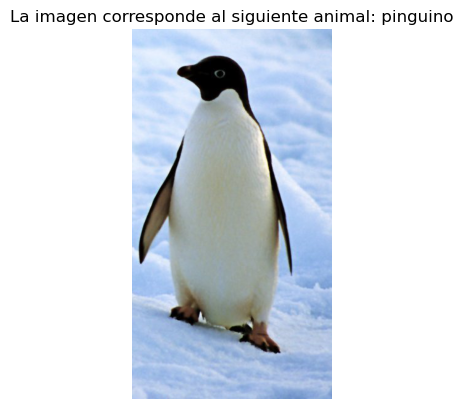

In [ ]:


model = load_model('modelo_CNN_personalizado.h5')

# Función para preprocesar una imagen nueva
def preprocess_new_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalizar la imagen
    return img_array

# Clasificación de la nueva imagen
def classify_and_show_image(img_path):
    img_array = preprocess_new_image(img_path)
    predictions = model.predict(img_array)
    class_names = ['pinguino', 'tortuga']
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions)

    
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'La imagen corresponde al siguiente animal: {predicted_class}')
    plt.show()


img_path = 'New_Images/Pinguino_1.jpg'  
classify_and_show_image(img_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


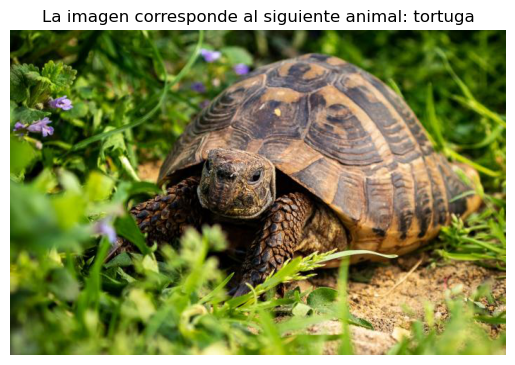

In [16]:
# Función para preprocesar una imagen nueva
def preprocess_new_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalizar la imagen
    return img_array

# Clasificación de la nueva imagen
def classify_and_show_image(img_path):
    img_array = preprocess_new_image(img_path)
    predictions = model.predict(img_array)
    class_names = ['pinguino', 'tortuga']
    predicted_class = class_names[np.argmax(predictions)]
    confidence = np.max(predictions)

    
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'La imagen corresponde al siguiente animal: {predicted_class}')
    plt.show()


img_path = 'New_Images/Tortuga_1.jpg'  
classify_and_show_image(img_path)
